### IMDB Web Crawling project

This scraping project will demostrate how to utilize BeautifulSoup select function and chrome extension selector gadget to quickly scraped the data we want. 

We will try to scraped movie data from IMDB website. First we will need to import the neccessary packages.

In [1]:
from bs4 import BeautifulSoup 
import requests
import csv
import pandas as pd

First, lets look at a IMDB movie sites. For demostration pupose, we will look at "The Avengers". 

https://www.imdb.com/title/tt0848228/?ref_=fn_tt_tt_1. 

![Screenshot](https://raw.githubusercontent.com/joeychen35/Web-Scraping/master/Screenshot%202020-06-21%2012.58.04.png)

We can use selector gadget extension to help us find the movie title selector. We can find the "Movie Title" selector by clicking on the movie title when open the selector gadget extension. We can tell the selector for movie title will be 'h1'. We then assign it to movie_title_selector. 

Please note, using Insepct on the website and copy the selector directly from it will also work in this case. Selector gadgets extension is just a simpler way to find the seletor for beginner. 

Selector gadget extension download link:

<https://chrome.google.com/webstore/detail/selectorgadget/mhjhnkcfbdhnjickkkdbjoemdmbfginb?>



![Screenshot](https://raw.githubusercontent.com/joeychen35/Web-Scraping/master/Screenshot%202020-06-21%2013.01.32.png)

For demostration purpose, I will only scraped five data for each movie. Feel free to scraped more to create a more comprehensive movie dataset.

In [2]:
# finding selectors 
movie_title_selector = 'h1'
movie_genre_selector = '.subtext a'
movie_cast_selector = '#titleCast .loadlate'
movie_poster_selector = '.poster img'
movie_rating_selector = '.ratingValue span'
url = 'https://www.imdb.com/title/tt0848228/'
headers = {"Accept-Language": "en-US,en;q=0.5"} # making sure the language scraped will be set in English
response = requests.get(url, headers = headers)
html_str = response.text
soup = BeautifulSoup(html_str)

Try to scraped movie data by using soup.select and the selector we found. 

In [3]:
movie_title = soup.select(movie_title_selector)[0].text.replace('\xa0', " ")
print(movie_title)
# getting movie_genre
movie_genre = [i.text for i in soup.select(movie_genre_selector)][:-1]
print(movie_genre)
# getting movie_cast
movie_cast = [i.get('alt') for i in soup.select(movie_cast_selector)]
print(movie_cast)
# getting movie_poster
movie_poster = soup.select(movie_poster_selector)[0].get('src')
print(movie_poster)
# getting movie_rating
movie_rating = float(soup.select(movie_rating_selector)[0].text)
print(movie_rating)

The Avengers (2012) 
['Action', 'Adventure', 'Sci-Fi']
['Robert Downey Jr.', 'Chris Evans', 'Mark Ruffalo', 'Chris Hemsworth', 'Scarlett Johansson', 'Jeremy Renner', 'Tom Hiddleston', 'Clark Gregg', 'Cobie Smulders', 'Stellan Skarsgård', 'Samuel L. Jackson', 'Gwyneth Paltrow', 'Paul Bettany', 'Alexis Denisof', 'Tina Benko']
https://m.media-amazon.com/images/M/MV5BNDYxNjQyMjAtNTdiOS00NGYwLWFmNTAtNThmYjU5ZGI2YTI1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX182_CR0,0,182,268_AL_.jpg
8.0


Now, I am going to put all the data together in a get_movie_data function. The input will be the movie url and it will return movie data in a print format.

In [4]:
def get_movie_data(movie_url):
    # finding selectors
    movie_title_selector = 'h1'
    movie_genre_selector = '.subtext a'
    movie_cast_selector = '#titleCast .loadlate'
    movie_poster_selector = '.poster img'
    movie_rating_selector = '.ratingValue span'
    #request data
    headers = {"Accept-Language": "en-US,en;q=0.5"}
    response = requests.get(movie_url, headers = headers)
    html_str = response.text
    soup = BeautifulSoup(html_str)
    # parsing data
    movie_title = soup.select(movie_title_selector)[0].text.replace('\xa0', " ")
    movie_poster = soup.select(movie_poster_selector)[0].get('src')
    movie_rating = float(soup.select(movie_rating_selector)[0].text)
    movie_genre = [i.text for i in soup.select(movie_genre_selector)][:-1]
    movie_cast = [i.get('alt') for i in soup.select(movie_cast_selector)]
    print('Movie Title : {}'.format(movie_title))
    print('Movie Poster link : {}'.format(movie_poster))
    print('Rating : {}'.format(movie_rating))
    print('Genre : {}'.format(movie_genre))
    print('Cast : {}'.format(movie_cast))
    

Testing the get_movie_data function with "Avenger: End Game" and "Joker" urls.

In [5]:
url = 'https://www.imdb.com/title/tt4154796/'
get_movie_data(url)

Movie Title : Avengers: Endgame (2019) 
Movie Poster link : https://m.media-amazon.com/images/M/MV5BMTc5MDE2ODcwNV5BMl5BanBnXkFtZTgwMzI2NzQ2NzM@._V1_UX182_CR0,0,182,268_AL_.jpg
Rating : 8.4
Genre : ['Action', 'Adventure', 'Drama']
Cast : ['Robert Downey Jr.', 'Chris Evans', 'Mark Ruffalo', 'Chris Hemsworth', 'Scarlett Johansson', 'Jeremy Renner', 'Don Cheadle', 'Paul Rudd', 'Benedict Cumberbatch', 'Chadwick Boseman', 'Brie Larson', 'Tom Holland', 'Karen Gillan', 'Zoe Saldana', 'Evangeline Lilly']


In [6]:
url = 'https://www.imdb.com/title/tt7286456/'
get_movie_data(url)

Movie Title : Joker (2019) 
Movie Poster link : https://m.media-amazon.com/images/M/MV5BNGVjNWI4ZGUtNzE0MS00YTJmLWE0ZDctN2ZiYTk2YmI3NTYyXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UX182_CR0,0,182,268_AL_.jpg
Rating : 8.5
Genre : ['Crime', 'Drama', 'Thriller']
Cast : ['Joaquin Phoenix', 'Robert De Niro', 'Zazie Beetz', 'Frances Conroy', 'Brett Cullen', 'Shea Whigham', 'Bill Camp', 'Glenn Fleshler', 'Leigh Gill', 'Josh Pais', 'Marc Maron', 'Sondra James', 'Murphy Guyer', 'Douglas Hodge']


We finally figured out how to scraped movie data from IMDB movie url. However, it is not intuitive and useful for user to look up the movie url and copy it. As a result, I create a function that can find the movie data by searching the movie title. 

In this function, first we will need to go to https://www.imdb.com/find?q=&ref_=nv_sr_sm. We can see the parameters in the url where q will be where we input the movie that we want to search for.  

In [7]:
fields_we_are_scaping = ["Movie Title", "Movie Poster Link", "Rating", "Genre", "Cast"] # creating fields that we are going to scraped
scraped_data = {keys:[] for keys in fields_we_are_scaping} # convert field to dict format

def get_movie_data_using_title(movie):
    scraped_data = {keys:[] for keys in fields_we_are_scaping} # clean up scraped data from previous search
    movie_title_selector = 'h1'
    movie_genre_selector = '.subtext a'
    movie_cast_selector = '#titleCast .loadlate'
    movie_poster_selector = '.poster img'
    movie_rating_selector = '.ratingValue span'
    #request finding data
    scraped_url_list = []
    headers = {"Accept-Language": "en-US,en;q=0.5"}
    params = {'q': movie, 's' : 'tt', 'ttype' : 'ft', 'ref' : 'fn_ft'} # q is our search input parameters
    response = requests.get('https://www.imdb.com/find', params = params, headers = headers)
    html_str = response.text
    soup = BeautifulSoup(html_str)
    search_result = soup.select('.result_text > a')
    for result in search_result:
        movie_url = 'https://www.imdb.com' + result.get('href') # combining the movies url with domain url
        scraped_url_list.append(movie_url)
        
    #request movie data from movie url
    for i, movie_url in enumerate (scraped_url_list[:10], start = 1): # only run ten search result, often times search result after the tenth is not relevant to our search
        headers = {"Accept-Language": "en-US,en;q=0.5"}
        response_movie = requests.get(movie_url, headers = headers)
        html_movie_str = response_movie.text
        soup_movie = BeautifulSoup(html_movie_str)
        # parsing data
        movie_title = soup_movie.select(movie_title_selector)[0].text.replace('\xa0', " ")
        print('Working on {}'.format(movie_url),'Movie: {}'.format(movie_title), i,'/', 10)
        
        try:
            movie_poster = soup_movie.select(movie_poster_selector)[0].get('src')
        except:
            movie_poster = 'NA'
        try:
            movie_rating = float(soup_movie.select(movie_rating_selector)[0].text)
        except:
            movie_rating = 'NA'
        movie_genre = [i.text for i in soup_movie.select(movie_genre_selector)][:-1]
        movie_cast = [i.get('alt') for i in soup_movie.select(movie_cast_selector)]        

        #appending all data to scraped data
        scraped_data['Movie Title'].append(movie_title)
        scraped_data['Movie Poster Link'].append(movie_poster)
        scraped_data['Rating'].append(movie_rating)
        scraped_data['Genre'].append(movie_genre)
        scraped_data['Cast'].append(movie_cast)
        

    return pd.DataFrame(scraped_data)


Testing out get_movie_data_using_title by inputing movie name in the function.

In [8]:
df = get_movie_data_using_title('Stars war')
df

Working on https://www.imdb.com/title/tt3748528/ Movie: Rogue One: A Star Wars Story (2016)  1 / 10
Working on https://www.imdb.com/title/tt2527338/ Movie: Star Wars: Episode IX - The Rise of Skywalker (2019)  2 / 10
Working on https://www.imdb.com/title/tt3778644/ Movie: Solo: A Star Wars Story (2018)  3 / 10
Working on https://www.imdb.com/title/tt1185834/ Movie: Star Wars: The Clone Wars (2008)  4 / 10
Working on https://www.imdb.com/title/tt2527336/ Movie: Star Wars: Episode VIII - The Last Jedi (2017)  5 / 10
Working on https://www.imdb.com/title/tt0076759/ Movie: Star Wars: Episode IV - A New Hope (1977)  6 / 10
Working on https://www.imdb.com/title/tt0120915/ Movie: Star Wars: Episode I - The Phantom Menace (1999)  7 / 10
Working on https://www.imdb.com/title/tt2488496/ Movie: Star Wars: Episode VII - The Force Awakens (2015)  8 / 10
Working on https://www.imdb.com/title/tt0080684/ Movie: Star Wars: Episode V - The Empire Strikes Back (1980)  9 / 10
Working on https://www.imdb.c

,Movie Title,Movie Poster Link,Rating,Genre,Cast
0,Rogue One: A Star Wars Story (2016),https://m.media-amazon.com/images/M/MV5BMjEwMz...,7.8,"[Action, Adventure, Sci-Fi]","[Felicity Jones, Diego Luna, Alan Tudyk, Donni..."
1,Star Wars: Episode IX - The Rise of Skywalker ...,https://m.media-amazon.com/images/M/MV5BMDljNT...,6.7,"[Action, Adventure, Fantasy]","[Carrie Fisher, Mark Hamill, Adam Driver, Dais..."
2,Solo: A Star Wars Story (2018),https://m.media-amazon.com/images/M/MV5BOTM2NT...,6.9,"[Action, Adventure, Sci-Fi]","[Alden Ehrenreich, Joonas Suotamo, Woody Harre..."
3,Star Wars: The Clone Wars (2008),https://m.media-amazon.com/images/M/MV5BMTI1MD...,5.9,"[Animation, Action, Adventure]","[Matt Lanter, Ashley Eckstein, James Arnold Ta..."
4,Star Wars: Episode VIII - The Last Jedi (2017),https://m.media-amazon.com/images/M/MV5BMjQ1Mz...,7.0,"[Action, Adventure, Fantasy]","[Mark Hamill, Carrie Fisher, Adam Driver, Dais..."
5,Star Wars: Episode IV - A New Hope (1977),https://m.media-amazon.com/images/M/MV5BNzVlY2...,8.6,"[Action, Adventure, Fantasy]","[Mark Hamill, Harrison Ford, Carrie Fisher, Pe..."
6,Star Wars: Episode I - The Phantom Menace (1999),https://m.media-amazon.com/images/M/MV5BYTRhNj...,6.5,"[Action, Adventure, Fantasy]","[Liam Neeson, Ewan McGregor, Natalie Portman, ..."
7,Star Wars: Episode VII - The Force Awakens (20...,https://m.media-amazon.com/images/M/MV5BOTAzOD...,7.9,"[Action, Adventure, Sci-Fi]","[Harrison Ford, Mark Hamill, Carrie Fisher, Ad..."
8,Star Wars: Episode V - The Empire Strikes Back...,https://m.media-amazon.com/images/M/MV5BYmU1ND...,8.7,"[Action, Adventure, Fantasy]","[Mark Hamill, Harrison Ford, Carrie Fisher, Bi..."
9,Star Wars: Episode VI - Return of the Jedi (19...,https://m.media-amazon.com/images/M/MV5BOWZlMj...,8.3,"[Action, Adventure, Fantasy]","[Mark Hamill, Harrison Ford, Carrie Fisher, Bi..."


We can also export the search movie data to a csv file and sort Star Wars series by IMDB rating.

In [12]:
df.to_csv('Movie_data.csv') #export stats to a csv file
df.index += 1 #setting index starting from 1 
df_rank = df.sort_values('Rating', ascending = False)
df_rank

,Movie Title,Movie Poster Link,Rating,Genre,Cast
10,Star Wars: Episode V - The Empire Strikes Back...,https://m.media-amazon.com/images/M/MV5BYmU1ND...,8.7,"[Action, Adventure, Fantasy]","[Mark Hamill, Harrison Ford, Carrie Fisher, Bi..."
7,Star Wars: Episode IV - A New Hope (1977),https://m.media-amazon.com/images/M/MV5BNzVlY2...,8.6,"[Action, Adventure, Fantasy]","[Mark Hamill, Harrison Ford, Carrie Fisher, Pe..."
11,Star Wars: Episode VI - Return of the Jedi (19...,https://m.media-amazon.com/images/M/MV5BOWZlMj...,8.3,"[Action, Adventure, Fantasy]","[Mark Hamill, Harrison Ford, Carrie Fisher, Bi..."
9,Star Wars: Episode VII - The Force Awakens (20...,https://m.media-amazon.com/images/M/MV5BOTAzOD...,7.9,"[Action, Adventure, Sci-Fi]","[Harrison Ford, Mark Hamill, Carrie Fisher, Ad..."
2,Rogue One: A Star Wars Story (2016),https://m.media-amazon.com/images/M/MV5BMjEwMz...,7.8,"[Action, Adventure, Sci-Fi]","[Felicity Jones, Diego Luna, Alan Tudyk, Donni..."
6,Star Wars: Episode VIII - The Last Jedi (2017),https://m.media-amazon.com/images/M/MV5BMjQ1Mz...,7.0,"[Action, Adventure, Fantasy]","[Mark Hamill, Carrie Fisher, Adam Driver, Dais..."
4,Solo: A Star Wars Story (2018),https://m.media-amazon.com/images/M/MV5BOTM2NT...,6.9,"[Action, Adventure, Sci-Fi]","[Alden Ehrenreich, Joonas Suotamo, Woody Harre..."
3,Star Wars: Episode IX - The Rise of Skywalker ...,https://m.media-amazon.com/images/M/MV5BMDljNT...,6.7,"[Action, Adventure, Fantasy]","[Carrie Fisher, Mark Hamill, Adam Driver, Dais..."
8,Star Wars: Episode I - The Phantom Menace (1999),https://m.media-amazon.com/images/M/MV5BYTRhNj...,6.5,"[Action, Adventure, Fantasy]","[Liam Neeson, Ewan McGregor, Natalie Portman, ..."
5,Star Wars: The Clone Wars (2008),https://m.media-amazon.com/images/M/MV5BMTI1MD...,5.9,"[Animation, Action, Adventure]","[Matt Lanter, Ashley Eckstein, James Arnold Ta..."


Lets create a bar chart to better visualize the dataset. By looking at the bar chart we can tell earlier version of Star Wars tend to have better IMDB rating.

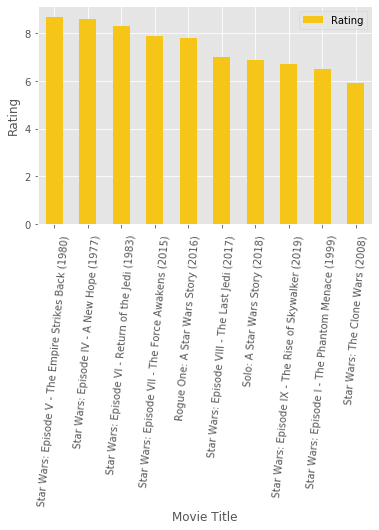

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df_rank.plot.bar(x = 'Movie Title', y = 'Rating', color = '#F5C518') # IMDB logo color
plt.xticks(rotation = 85)
plt.xlabel('Movie Title')
plt.ylabel('Rating')
plt.show()